In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_df = pd.read_csv("./Data/Titanic/train.csv")
test_df = pd.read_csv("./Data/Titanic/test.csv")

In [3]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
test_df.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train_df.set_index(train_df.PassengerId, inplace=True) # inplace = true là ứng dụng ngay trên bản data này

In [7]:
train_df.head()
train_df.drop('PassengerId', axis=1, inplace=True)

In [8]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
test_df = pd.read_csv("./Data/Titanic/test.csv",index_col="PassengerId")
test_df.tail()


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


# 1. Feature classification: categorical vs numerical 
 - Categorical Features: Đây là các đặc trưng mà giá trị của chúng rơi vào một tập hợp hữu hạn các nhãn hoặc các danh mục. Categorical features thường chỉ mô tả các thuộc tính không có tính chất số đo, mà thường là các thuộc tính phân loại. Ví dụ, giới tính (nam/nữ), loại sản phẩm (áo quần, giày dép, đồ điện tử), màu sắc (đỏ, xanh, vàng) là các ví dụ về categorical features. Categorical features có thể được biểu diễn bằng các giá trị số hoặc các nhãn, nhưng không có thứ tự tự nhiên trong số.

 - Numerical Features: Đây là các đặc trưng có giá trị là các số học, có thể là các giá trị liên tục hoặc rời rạc. Numerical features mô tả các thuộc tính có tính chất số đo, có thể thể hiện mức độ, kích thước, hoặc số lượng. Ví dụ, tuổi, chiều cao, giá tiền, thời gian là các ví dụ về numerical features. Numerical features có thể được sử dụng trong các phép tính toán số học, thống kê và quyết định dựa trên các giá trị số.

In [10]:
train_df.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [11]:
train_df["Survived"] = train_df["Survived"].astype("category")

In [12]:
train_df["Survived"].dtype

CategoricalDtype(categories=[0, 1], ordered=False)

In [13]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    int64   
 2   Name      891 non-null    object  
 3   Sex       891 non-null    object  
 4   Age       714 non-null    float64 
 5   SibSp     891 non-null    int64   
 6   Parch     891 non-null    int64   
 7   Ticket    891 non-null    object  
 8   Fare      891 non-null    float64 
 9   Cabin     204 non-null    object  
 10  Embarked  889 non-null    object  
dtypes: category(1), float64(2), int64(3), object(5)
memory usage: 77.6+ KB


In [14]:
features =['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']
def convert_cate(df, features):
 for feature in features:
  df[feature] = df[feature].astype('category')

convert_cate(train_df,features)
convert_cate(test_df,features)

In [15]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    category
 2   Name      891 non-null    object  
 3   Sex       891 non-null    category
 4   Age       714 non-null    float64 
 5   SibSp     891 non-null    category
 6   Parch     891 non-null    category
 7   Ticket    891 non-null    object  
 8   Fare      891 non-null    float64 
 9   Cabin     204 non-null    object  
 10  Embarked  889 non-null    category
dtypes: category(6), float64(2), object(3)
memory usage: 48.2+ KB


# Distribution of numerical feature values across the samples

In [16]:
train_df.describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


In [17]:
train_df.describe(include=['category'])

,Survived,Pclass,Sex,SibSp,Parch,Embarked
count,891,891,891,891,891,889
unique,2,3,2,7,7,3
top,0,3,male,0,0,S
freq,549,491,577,608,678,644


# 3. Exploratory data Analysis (EDA) - Phân tích khai phá dữ liệu

In [18]:
train_df['Survived'].value_counts().to_frame()


,count
Survived,
0,549
1,342


In [19]:
train_df['Survived'].value_counts(normalize=True).to_frame()

,proportion
Survived,
0,0.616162
1,0.383838


In [20]:
# Saming 
# Sex

train_df['Sex'].value_counts(normalize=True).to_frame()

,proportion
Sex,
male,0.647587
female,0.352413


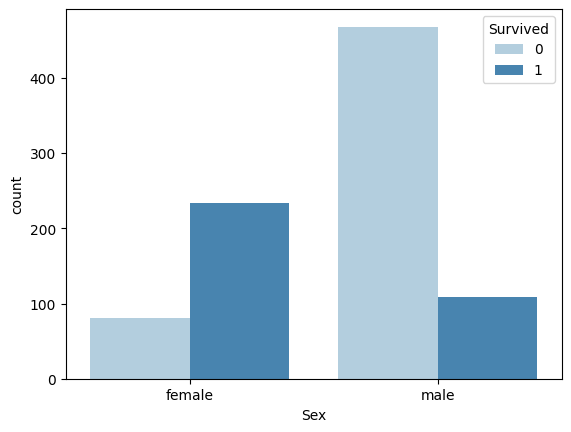

In [21]:
sns.countplot(data=train_df,x="Sex",hue='Survived',palette="Blues");

- Remaining categorical feature columns

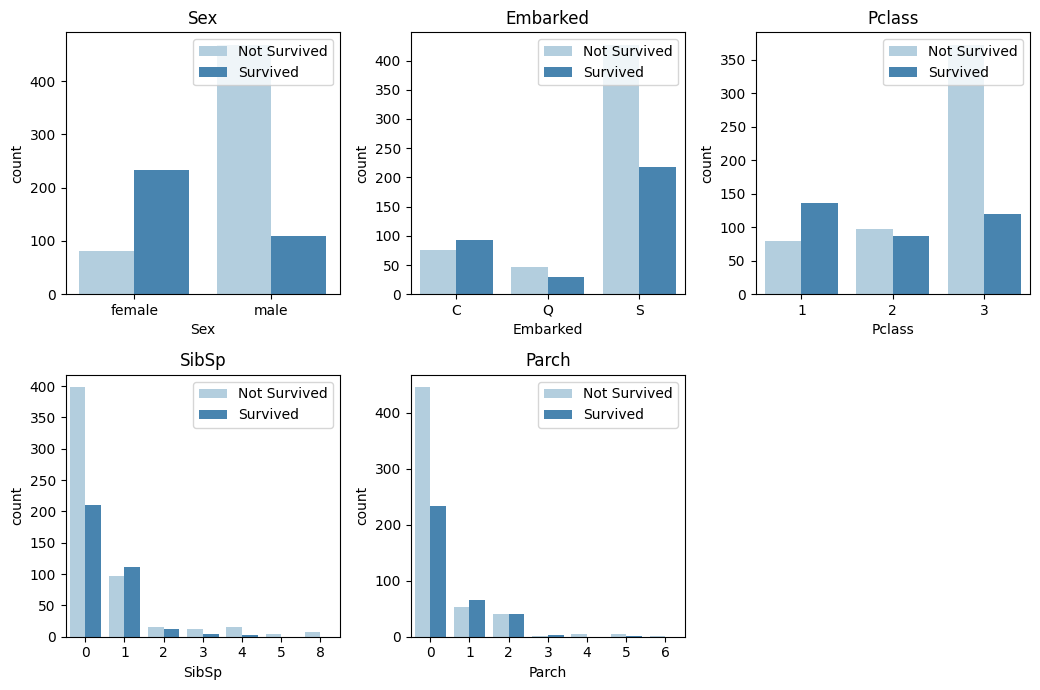

In [22]:
cols = ['Sex','Embarked','Pclass','SibSp','Parch']

n_rows = 2
n_cols= 3

fig,ax = plt.subplots(n_rows,n_cols,figsize=(n_cols*3.5,n_rows*3.5))

for r in range(0,n_rows):
 for c in range(0,n_cols):
  i = r*n_cols + c # index 
  if i< len(cols):
   ax_i = ax[r,c]
   sns.countplot(data=train_df,x= cols[i],hue="Survived",palette="Blues",ax=ax_i)
   ax_i.set_title(cols[i])
   ax_i.legend(title="", loc="upper right",labels=["Not Survived","Survived"])

ax.flat[-1].set_visible(False) # Remove last subplot
plt.tight_layout()
plt.show()

Age

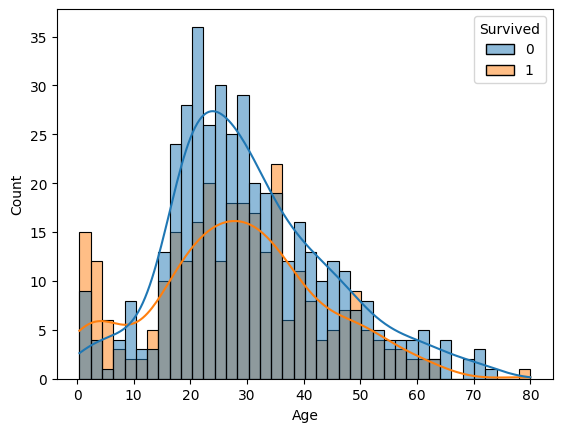

In [23]:
sns.histplot(data=train_df,x='Age',hue='Survived',bins=40,kde=True);

# Fare

In [24]:
train_df["Fare"].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

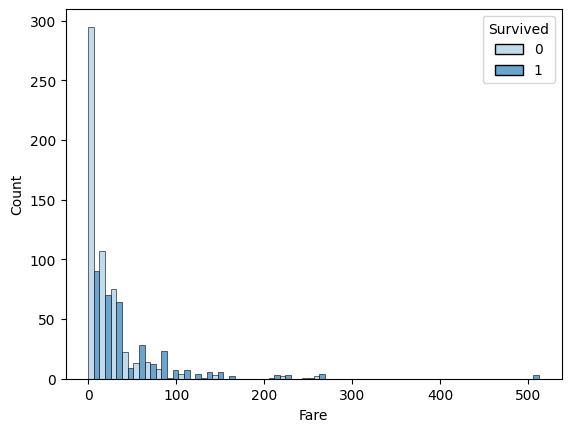

In [25]:
sns.histplot(data=train_df,x="Fare", hue="Survived", multiple="dodge",bins=40,palette="Blues");

<Axes: xlabel='Fare', ylabel='count'>

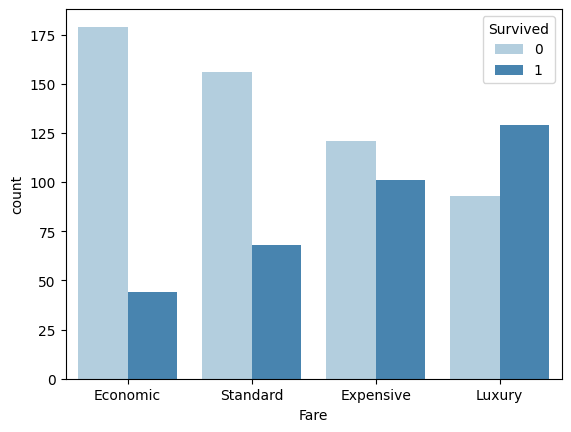

In [26]:
#chia thanh tung khoang
fare_categories =["Economic","Standard","Expensive","Luxury"]
quartile_data = pd.qcut(train_df["Fare"],q=4,labels=fare_categories)

sns.countplot(x=quartile_data,hue=train_df["Survived"],palette="Blues")

In [27]:
train_df['Fare']

PassengerId
1       7.2500
2      71.2833
3       7.9250
4      53.1000
5       8.0500
        ...   
887    13.0000
888    30.0000
889    23.4500
890    30.0000
891     7.7500
Name: Fare, Length: 891, dtype: float64

# 4. Feature Engineering & Data Wrangling - Làm sạch dữ liệu
 - Feature Engineering (Kỹ thuật tạo đặc trưng):
    + Feature Engineering là quá trình tạo ra các đặc trưng mới từ dữ liệu gốc để cải thiện hiệu suất của mô hình Machine Learning. Mục tiêu của Feature Engineering là tạo ra những đặc trưng (features) có ý nghĩa, phản ánh sự biểu diễn tốt nhất cho dữ liệu và giúp mô hình hiểu và tìm ra mối quan hệ, thông tin quan trọng từ dữ liệu.
 - Data Wrangling (Xử lý dữ liệu):
    + Data Wrangling là quá trình chuẩn bị dữ liệu trước khi áp dụng các phương pháp Machine Learning. Nhiệm vụ chính của Data Wrangling là làm sạch, chuẩn hóa và biến đổi dữ liệu để đảm bảo tính chính xác và phù hợp với mô hình dự đoán.

# Name

In [28]:
train_df["Name"].tail(10)

PassengerId
882                          Markun, Mr. Johann
883                Dahlberg, Miss. Gerda Ulrika
884               Banfield, Mr. Frederick James
885                      Sutehall, Mr. Henry Jr
886        Rice, Mrs. William (Margaret Norton)
887                       Montvila, Rev. Juozas
888                Graham, Miss. Margaret Edith
889    Johnston, Miss. Catherine Helen "Carrie"
890                       Behr, Mr. Karl Howell
891                         Dooley, Mr. Patrick
Name: Name, dtype: object

In [29]:
import re
def extract_title(name):
 p = re.compile(r",([\w\s]+)\.") # check in page => regex101.com
 return p.search(name).groups(1)[0].strip()

train_df['Title'] =  train_df['Name'].apply(lambda name: extract_title(name))

In [30]:
train_df["Title"].value_counts()

Title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: count, dtype: int64

In [31]:
test_df['Title'] = test_df["Name"].apply(lambda name: extract_title(name))

In [32]:
test_df["Title"].value_counts()

Title
Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: count, dtype: int64

In [33]:
def group_titles(title):
 if title in ["Mr", "Mrs", "Miss", "Master"]:
  return title
 elif title=="Ms":
  return "Miss"
 else:
  return "Others"

train_df["Title"] = train_df["Title"].apply(lambda tittle : group_titles(tittle))
test_df["Title"] = test_df["Title"].apply(lambda tittle : group_titles(tittle))

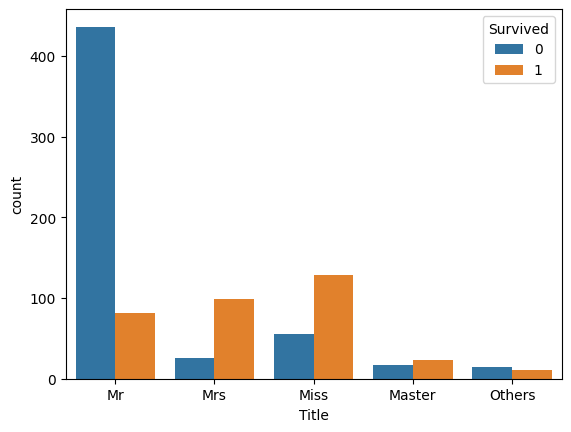

In [34]:
sns.countplot(data=train_df,x="Title",hue="Survived");

# Family 

In [35]:
train_df["Family_Size"] = train_df['SibSp'].astype('int') + train_df['Parch'].astype('int') +1

In [36]:
test_df["Family_Size"] = test_df['SibSp'].astype('int') + test_df['Parch'].astype('int') +1

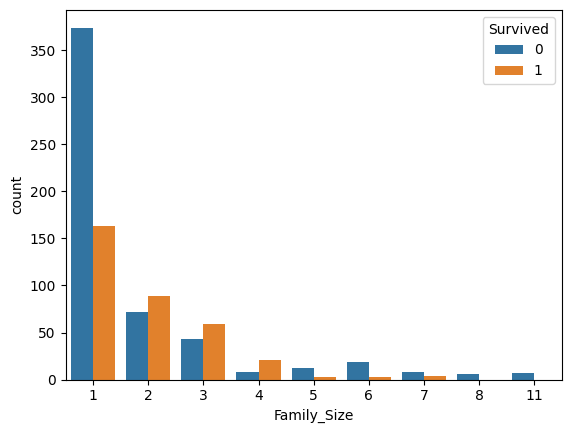

In [37]:
sns.countplot(data=train_df,x ="Family_Size",hue="Survived") ;

In [38]:
train_df["Family_Cat"] = pd.cut(train_df["Family_Size"],bins=[0,1,4,6,20],labels=["Solo","Small","Medium","Large"])     
test_df["Family_Cat"] = pd.cut(test_df["Family_Size"],bins=[0,1,4,6,20],labels=["Solo","Small","Medium","Large"])     


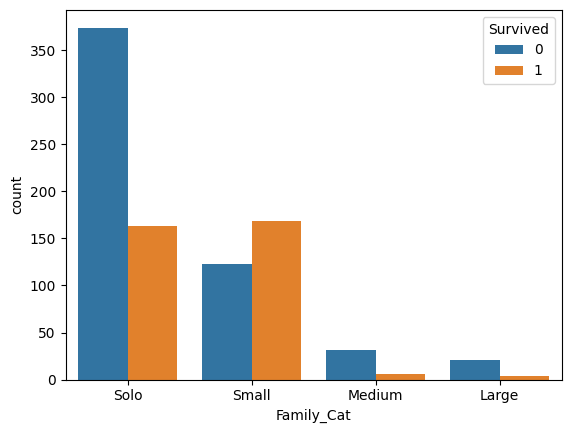

In [39]:
sns.countplot(data=train_df,x ="Family_Cat",hue="Survived") ;


# Data Warngling - lam sach du lieu

In [40]:
num_features = ['Age', 'Fare']
cate_features = ['Pclass', 'Sex', 'Title', 'Family_Cat', 'Embarked']

feature_cols = num_features + cate_features
feature_cols

['Age', 'Fare', 'Pclass', 'Sex', 'Title', 'Family_Cat', 'Embarked']

In [41]:
def display_missing(df,feature_cols):
 n_rows = df.shape[0]
 for col in feature_cols:
  missing_count = df[col].isnull().sum()
  if missing_count > 0:
   print(col,missing_count/n_rows)
  
  
display_missing(train_df,feature_cols)
display_missing(test_df,feature_cols)

Age 0.19865319865319866
Embarked 0.002244668911335578
Age 0.20574162679425836
Fare 0.0023923444976076554


# Filling missing values

In [47]:
# Age



